<a href="https://colab.research.google.com/github/Manos-Mak120/-/blob/Vectorization/TRUMP_VECTORIZATION_ATHENS_VOICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import seaborn as sns

In [ ]:
 !python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 70.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
trump_articles_df = pd.read_csv("/content/drive/MyDrive/Athens.voice/Articles/Trump-articles-24 25-ATHENS VOICE.csv")
trump_articles_df.head(200) # This is a syntax error - head() takes an int argument not slice

,article_url,title,date,time,section,author,excerpt,subtitle,text_body,feat_img_link
0,https://www.athensvoice.gr/epikairotita/diethn...,«Σχέδιο Β» από τις Βρυξέλλες σε περίπτωση που ...,2025-04-30,19:50:02,Κοσμος,Newsroom,Συνεχίζονται οι συνομιλίες με την Ουάσινγκτον ...,Ανησυχίες ότι η Ουάσινγκτον δεν θα εξασφαλίσει...,Η Ευρωπαϊκή Ένωση ετοιμάζει ένα «σχέδιο Β» για...,https://www.athensvoice.gr/images/1074x600/1/j...
1,https://www.athensvoice.gr/epikairotita/diethn...,Αιχμές Τραμπ προς Κίνα: Τα πάει πολύ άσχημα αυ...,2025-04-30,17:51:57,Κοσμος,Newsroom,"Τα σχόλια, έγιναν σε συνέχεια έκθεσης που δημο...","«Σε κάποιο σημείο, ελπίζω ότι θα κάνουμε μια σ...","Ο πρόεδρος των ΗΠΑ, Ντόναλντ Τραμπ δήλωσε κατά...",https://www.athensvoice.gr/images/1074x600/1/j...
2,https://www.athensvoice.gr/epikairotita/diethn...,Διαμαρτυρία της Greenpeace στο γήπεδο γκολφ το...,2025-04-30,15:37:53,Κοσμος,Newsroom,Είναι η δεύτερη φορά τους τελευταίους δύο μήνε...,"«Καιρός για αντίσταση», έγραψαν οι ακτιβιστές ...",Οι παίκτες που έπαιζαν γκολφ στο γήπεδο Trump ...,https://www.athensvoice.gr/images/1074x600/1/j...
3,https://www.athensvoice.gr/epikairotita/ellada...,Εργατική Πρωτομαγιά 2025: 24ωρη απεργία στη Γρ...,2025-04-30,13:46:00,Ελλαδα,Newsroom,Εργατική Πρωτομαγιά 2025: 24ωρη απεργία στη Γρ...,Πώς θα κινηθούν άλλα μέσα,"Χωρίς τραμ θα είναι αύριο, Πέμπτη (1η Μαΐου) η...",https://www.athensvoice.gr/images/1074x600/jpg...
4,https://www.athensvoice.gr/epikairotita/diethn...,Συρρικνώθηκε η οικονομία των ΗΠΑ στο πρώτο τρί...,2025-04-30,13:43:59,Κοσμος,Newsroom,"Η οικονομία των ΗΠΑ συρρικνώθηκε 0,3% στο πρώτ...",Δασμοί και διεθνείς εντάσεις ρίχνουν την καταν...,Η οικονομία των ΗΠΑ κατέγραψε ύφεση κατά το πρ...,https://www.athensvoice.gr/images/1074x600/jpg...
...,...,...,...,...,...,...,...,...,...,...
195,https://www.athensvoice.gr/epikairotita/diethn...,Δασμοί Τραμπ: Έως και 200 δισ. ευρώ η ζημιά γι...,2025-04-03,11:14:58,Κοσμος,Newsroom,Σοβαρές ζημιές στην γερμανική και την ευρωπαϊκ...,Η Ευρωπαϊκή Ένωση αντιμέτωπη με ένα διαφορετικ...,Σε ζημιά έως και 200 δισεκατομμυρίων για την Γ...,https://www.athensvoice.gr/images/1074x600/1/j...
196,https://www.athensvoice.gr/epikairotita/politi...,Κ. Μητσοτάκης: Η ελληνική οικονομία θα αντεπεξ...,2025-04-03,10:44:01,Πολιτικη & Οικονομια,Newsroom,Η ελληνική οικονομία με σχέδιο και υπευθυνότητ...,«Ο εμπορικός πόλεμος θα βλάψει τους πάντες. Ελ...,Ο πρωθυπουργός Κυριάκος Μητσοτάκης διαβεβαίωσε...,https://www.athensvoice.gr/images/1074x600/1/j...
197,https://www.athensvoice.gr/epikairotita/diethn...,Explainer: Ποια είναι τα πέντε βασικά συμπεράσ...,2025-04-03,09:54:31,Κοσμος,Newsroom,Δασμοί από τις ΗΠΑ: Τα πέντε βασικά συμπεράσμα...,Η ανάλυση του Guardian μετά τις ανακοινώσεις τ...,Σε ανάλυσή του ο Guardian στέκεται σε πέντε ση...,https://www.athensvoice.gr/images/1074x600/jpg...
198,https://www.athensvoice.gr/epikairotita/diethn...,Ο Ντόναλντ Τραμπ μπροστά στο μεγαλύτερο στοίχη...,2025-04-03,05:59:04,Κοσμος,Newsroom,Ο Ντόναλντ Τραμπ μπροστά στο μεγαλύτερο στοίχη...,Η ανάλυση του BBC για τους δασμούς που ανακοίν...,"Αναταράξεις, αντιδράσεις και ανησυχίες συνοδεύ...",https://www.athensvoice.gr/images/1074x600/jpg...


In [ ]:
trump_articles_df.head(1)

,article_url,title,date,time,section,author,excerpt,subtitle,text_body,feat_img_link
0,https://www.athensvoice.gr/epikairotita/diethn...,«Σχέδιο Β» από τις Βρυξέλλες σε περίπτωση που ...,2025-04-30,19:50:02,Κοσμος,Newsroom,Συνεχίζονται οι συνομιλίες με την Ουάσινγκτον ...,Ανησυχίες ότι η Ουάσινγκτον δεν θα εξασφαλίσει...,Η Ευρωπαϊκή Ένωση ετοιμάζει ένα «σχέδιο Β» για...,https://www.athensvoice.gr/images/1074x600/1/j...


In [ ]:
trump_articles_df.dtypes

,0
article_url,object
title,object
date,object
time,object
section,object
author,object
excerpt,object
subtitle,object
text_body,object
feat_img_link,object


In [ ]:
# Select the 'date' and 'time' columns and concatenate their string representations
# with a space in between to form a single string column suitable for pd.to_datetime

# Ensure the 'time' column is treated as strings
trump_articles_df['time'] = trump_articles_df['time'].astype(str)

# Extract only the hour and minute from the time string using string slicing
# Assumes the format is consistently 'HH:MM:SS' or similar at the start
trump_articles_df['time_formatted'] = trump_articles_df['time'].str[:5]

datetime_str = trump_articles_df['date'].astype(str) + ' ' + trump_articles_df['time_formatted']

# Convert the combined string column to datetime objects
# Use the format that matches the concatenated string
trump_articles_df['datetime'] = pd.to_datetime(datetime_str, format='%Y-%m-%d %H:%M')

# Display the first few rows to verify the new 'datetime' columntr
trump_articles_df.head()

,article_url,title,date,time,section,author,excerpt,subtitle,text_body,feat_img_link,time_formatted,datetime
0,https://www.athensvoice.gr/epikairotita/diethn...,«Σχέδιο Β» από τις Βρυξέλλες σε περίπτωση που ...,2025-04-30,19:50:02,Κοσμος,Newsroom,Συνεχίζονται οι συνομιλίες με την Ουάσινγκτον ...,Ανησυχίες ότι η Ουάσινγκτον δεν θα εξασφαλίσει...,Η Ευρωπαϊκή Ένωση ετοιμάζει ένα «σχέδιο Β» για...,https://www.athensvoice.gr/images/1074x600/1/j...,19:50,2025-04-30 19:50:00
1,https://www.athensvoice.gr/epikairotita/diethn...,Αιχμές Τραμπ προς Κίνα: Τα πάει πολύ άσχημα αυ...,2025-04-30,17:51:57,Κοσμος,Newsroom,"Τα σχόλια, έγιναν σε συνέχεια έκθεσης που δημο...","«Σε κάποιο σημείο, ελπίζω ότι θα κάνουμε μια σ...","Ο πρόεδρος των ΗΠΑ, Ντόναλντ Τραμπ δήλωσε κατά...",https://www.athensvoice.gr/images/1074x600/1/j...,17:51,2025-04-30 17:51:00
2,https://www.athensvoice.gr/epikairotita/diethn...,Διαμαρτυρία της Greenpeace στο γήπεδο γκολφ το...,2025-04-30,15:37:53,Κοσμος,Newsroom,Είναι η δεύτερη φορά τους τελευταίους δύο μήνε...,"«Καιρός για αντίσταση», έγραψαν οι ακτιβιστές ...",Οι παίκτες που έπαιζαν γκολφ στο γήπεδο Trump ...,https://www.athensvoice.gr/images/1074x600/1/j...,15:37,2025-04-30 15:37:00
3,https://www.athensvoice.gr/epikairotita/ellada...,Εργατική Πρωτομαγιά 2025: 24ωρη απεργία στη Γρ...,2025-04-30,13:46:00,Ελλαδα,Newsroom,Εργατική Πρωτομαγιά 2025: 24ωρη απεργία στη Γρ...,Πώς θα κινηθούν άλλα μέσα,"Χωρίς τραμ θα είναι αύριο, Πέμπτη (1η Μαΐου) η...",https://www.athensvoice.gr/images/1074x600/jpg...,13:46,2025-04-30 13:46:00
4,https://www.athensvoice.gr/epikairotita/diethn...,Συρρικνώθηκε η οικονομία των ΗΠΑ στο πρώτο τρί...,2025-04-30,13:43:59,Κοσμος,Newsroom,"Η οικονομία των ΗΠΑ συρρικνώθηκε 0,3% στο πρώτ...",Δασμοί και διεθνείς εντάσεις ρίχνουν την καταν...,Η οικονομία των ΗΠΑ κατέγραψε ύφεση κατά το πρ...,https://www.athensvoice.gr/images/1074x600/jpg...,13:43,2025-04-30 13:43:00


In [ ]:
short_trump_df = trump_articles_df[['datetime','excerpt']]
short_trump_df = trump_articles_df.reset_index(drop=True)
# Now that short_biden_df is defined, we can localize the timezone
short_trump_df['datetime'] = short_trump_df['datetime'].dt.tz_localize(None)
short_trump_df.head(1)

,article_url,title,date,time,section,author,excerpt,subtitle,text_body,feat_img_link,time_formatted,datetime
0,https://www.athensvoice.gr/epikairotita/diethn...,«Σχέδιο Β» από τις Βρυξέλλες σε περίπτωση που ...,2025-04-30,19:50:02,Κοσμος,Newsroom,Συνεχίζονται οι συνομιλίες με την Ουάσινγκτον ...,Ανησυχίες ότι η Ουάσινγκτον δεν θα εξασφαλίσει...,Η Ευρωπαϊκή Ένωση ετοιμάζει ένα «σχέδιο Β» για...,https://www.athensvoice.gr/images/1074x600/1/j...,19:50,2025-04-30 19:50:00


In [ ]:
trump_articles_df['datetime'] = pd.to_datetime(trump_articles_df['datetime'], format='mixed', dayfirst=True, errors='coerce')

In [ ]:
short_trump_df['datetime'] = short_trump_df['datetime'].dt.tz_localize(None)

In [ ]:
short_trump_df = trump_articles_df[['datetime','excerpt']]
short_trump_df = short_trump_df.reset_index(drop=True)
short_trump_df.head(1)

,datetime,excerpt
0,2025-04-30 19:50:00,Συνεχίζονται οι συνομιλίες με την Ουάσινγκτον ...


In [ ]:
short_trump_df['year'] = pd.DatetimeIndex(short_trump_df['datetime']).year
short_trump_df['month'] = pd.DatetimeIndex(short_trump_df['datetime']).month
short_trump_df['day'] = pd.DatetimeIndex(short_trump_df['datetime']).day
short_trump_df['hour'] = pd.DatetimeIndex(short_trump_df['datetime']).hour

In [ ]:
short_trump_df.head()

,datetime,excerpt,year,month,day,hour
0,2025-04-30 19:50:00,Συνεχίζονται οι συνομιλίες με την Ουάσινγκτον ...,2025,4,30,19
1,2025-04-30 17:51:00,"Τα σχόλια, έγιναν σε συνέχεια έκθεσης που δημο...",2025,4,30,17
2,2025-04-30 15:37:00,Είναι η δεύτερη φορά τους τελευταίους δύο μήνε...,2025,4,30,15
3,2025-04-30 13:46:00,Εργατική Πρωτομαγιά 2025: 24ωρη απεργία στη Γρ...,2025,4,30,13
4,2025-04-30 13:43:00,"Η οικονομία των ΗΠΑ συρρικνώθηκε 0,3% στο πρώτ...",2025,4,30,13


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer() #πάντα αυτό

In [ ]:
short_trump_df.head(5)

,datetime,excerpt,year,month,day,hour
0,2025-04-30 19:50:00,Συνεχίζονται οι συνομιλίες με την Ουάσινγκτον ...,2025,4,30,19
1,2025-04-30 17:51:00,"Τα σχόλια, έγιναν σε συνέχεια έκθεσης που δημο...",2025,4,30,17
2,2025-04-30 15:37:00,Είναι η δεύτερη φορά τους τελευταίους δύο μήνε...,2025,4,30,15
3,2025-04-30 13:46:00,Εργατική Πρωτομαγιά 2025: 24ωρη απεργία στη Γρ...,2025,4,30,13
4,2025-04-30 13:43:00,"Η οικονομία των ΗΠΑ συρρικνώθηκε 0,3% στο πρώτ...",2025,4,30,13


In [ ]:
short_trump_df.shape

(778, 6)

In [ ]:
short_trump_df['excerpt'] = short_trump_df['excerpt'].fillna('')

In [ ]:
count_vector = cv.fit_transform(short_trump_df['excerpt']) #παίρνουμε τα κείμενα

In [ ]:
count_vector #μοναδικές λέξεις 11520 + 120

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 12440 stored elements and shape (778, 3808)>

In [ ]:
count_vector.shape

(778, 3808)

In [ ]:
BoW = cv.get_feature_names_out()
list(BoW)[1400:1410]

['ελεύθερους',
 'ελιγμών',
 'ελλάδα',
 'ελλάδας',
 'ελληνίδα',
 'ελληνική',
 'ελληνικό',
 'ελον',
 'ελπίζει',
 'ελπίζουν']

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,00s,03,04,10,100,12,125,145,...,ότι,ότο,όχι,ύπαρξη,ύφεση,ύφεσης,ύψους,ώρα,ώρας,ώρες
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

Και ξαναδιανυσματοποιούμε τα κείμενα των άρθρων μας

In [ ]:
count_vector = cv.fit_transform(short_trump_df['excerpt'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,00s,03,04,10,100,12,125,145,...,όρμπαν,όροι,ότο,ύπαρξη,ύφεση,ύφεσης,ύψους,ώρα,ώρας,ώρες
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), max_df=0.95, min_df=0.01) #πάρε ο,τι είναι πάνω του 95% των κειμένων

In [ ]:
count_vector = cv.fit_transform(short_trump_df['excerpt'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,000,10,100,cnn,explainer,nτόναλντ,tραμπ,έλον,αμερικανική,αμερικανός,...,σχέδιο,τέλος,τζο,τραμ,τραμπ,υπέγραψε,χάρβαρντ,χάρη,χρόνια,χώρες
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20) # δειξε μου τα 20 πιο συχνά
count_vector = cv.fit_transform(short_trump_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,δήλωσε,δασμοί,δασμούς,δασμών,ζελένσκι,ηπα,θέλει,λευκό,μασκ,νέα,ντόναλντ,οίκο,ορκωμοσία,ουκρανία,πούτιν,προέδρου,πρόεδρος,συμφωνία,συνάντηση,τραμπ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


**Vectorizer με stop words, max features και token pattern**

In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20) # δειξε μου τα 20 πιο συχνά
count_vector = cv.fit_transform(short_trump_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,δήλωσε,δασμοί,δασμούς,δασμών,ζελένσκι,ηπα,θέλει,λευκό,μασκ,νέα,ντόναλντ,οίκο,ορκωμοσία,ουκρανία,πούτιν,προέδρου,πρόεδρος,συμφωνία,συνάντηση,τραμπ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


**Vectorizer με ngrams**

In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_trump_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,nτόναλντ τραμπ,έλον μασκ,αμερικανός πρόεδρος,δασμοί τραμπ,δασμούς τραμπ,δασμών τραμπ,δεύτερη θητεία,ηπα ντόναλντ,λευκού οίκου,λευκό οίκο,μελάνια τραμπ,ντόναλντ τραμπ,ορκωμοσία ντόναλντ,ορκωμοσία τραμπ,προέδρου ηπα,πρόεδρος ηπα,τζο μπάιντεν,τραμπ απειλεί,τραμπ ζελένσκι,τραμπ πούτιν
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
results.sum(axis =0).sort_values(ascending = False) #Προσθήκη axis στο συνολο των αποτελσμάτων . Στα rows. Μελετάει τις εμφανίσεις αυτού τοτ term.

,0
ντόναλντ τραμπ,281
πρόεδρος ηπα,31
λευκό οίκο,27
ορκωμοσία τραμπ,19
προέδρου ηπα,19
ηπα ντόναλντ,17
δασμοί τραμπ,15
nτόναλντ τραμπ,14
αμερικανός πρόεδρος,13
τραμπ ζελένσκι,12


In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

,0
ντόναλντ τραμπ,281
πρόεδρος ηπα,31
λευκό οίκο,27
ορκωμοσία τραμπ,19
προέδρου ηπα,19


**Vectorizer με χρήση λεξικού**

In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,  #Με αυτό το τρόπο φτιάχνουμε ένα λεξικό παίρνωντας τις λέξεις
                     vocabulary = ['εκλογές', 'πρόεδρος', 'ορκομωσία'])
count_vector = cv.fit_transform(short_trump_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,εκλογές,πρόεδρος,ορκομωσία
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [ ]:
results.sort_values(by=['εκλογές'], ascending=False).head()

,εκλογές,πρόεδρος,ορκομωσία
680,1,0,0
647,1,0,0
669,1,0,0
423,1,0,0
762,1,0,0


In [ ]:
short_trump_df['excerpt'].loc[10]

'Ο Πέδρο Αλμοδόβαρ χαρακτήρισε τον Ντόναλντ Τραμπ «καταστροφή» και «μεγαλύτερο λάθος της εποχής μας» σε ομιλία του στη Νέα Υόρκη.'

In [ ]:
short_trump_df = trump_articles_df[['datetime','excerpt', 'title']]
short_trump_df = short_trump_df.reset_index(drop=True)
# Now that short_biden_df is defined, we can localize the timezone
short_trump_df['datetime'] = short_trump_df['datetime'].dt.tz_localize(None)
short_trump_df.head(1)

,datetime,excerpt,title
0,2025-04-30 19:50:00,Συνεχίζονται οι συνομιλίες με την Ουάσινγκτον ...,«Σχέδιο Β» από τις Βρυξέλλες σε περίπτωση που ...


Τώρα αν θέλω μπορώ να κοιτάξω τι διγράμματα υπάρχουν σ' συτό άρθρο

In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=10, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_trump_df.iloc[[10]]['excerpt'])
results114 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
sum_words114 =  results114.sum(axis =0)
sum_words114.sort_values(ascending = False).head()

,0
αλμοδόβαρ χαρακτήρισε,1
εποχής ομιλία,1
καταστροφή μεγαλύτερο,1
λάθος εποχής,1
μεγαλύτερο λάθος,1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
# Ensure the 'excerpt' column has no NaN values before fitting
short_trump_df['excerpt'] = short_trump_df['excerpt'].fillna('')
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_trump_df['excerpt'])  #finds the tfidf score with normalization

In [ ]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

,000,10,100,20,2025,22,25,28,47ος,47ου,...,χούθι,χρηματιστήρια,χρηματοδότηση,χρόνια,χόλιγουντ,χώρα,χώρας,χώρες,ύφεση,ώρες
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.514062,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity #ΚΑΤΑ ΠΟΣΟ ΤΑ ΑΡΘΡΑ ΜΟΥ ΔΙΑΦΕΡΟΥΝ ΑΠΟ ΤΟΥΣ ΥΠΟΛΟΙΠΟΥΣ. ΠΟΣΟ ΟΙ ΑΛΛΟΙ ΕΧΟΥΝ ΕΠΗΡΕΑΣΤΕΙ ΑΠΟ ΜΕΝΑ

print("cosine scores ==> ")
print(cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with all elements (including itself)

cosine scores ==> 
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.27442913 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.20072238 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.      

In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train) # συγκρίνουμε όλα τα άρθρα μεταξύ τους

In [ ]:
len(arr)

778

Ας δούμε ποια άρθρα μοιάζουν περισσότερο με το 1ο

<Axes: >

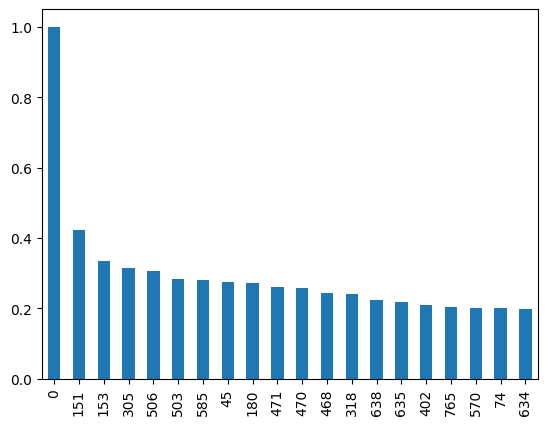

In [ ]:
pd.DataFrame(arr).loc[0].sort_values(ascending = False).head(20).plot(kind = 'bar')

Βλέπουμε ότι με το 1ο άρθρο μοιάζει περισσότερο το 4ο

In [ ]:
short_trump_df['excerpt'].loc[0]

'Συνεχίζονται οι συνομιλίες με την Ουάσινγκτον και άλλους εταίρους για να διασφαλιστεί πως θα διατηρηθούν οι κυρώσεις της Δύσης σε βάρος της Ρωσίας'

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_trump_df['excerpt'])  #finds the tfidf score with normalization

In [ ]:
short_trump_df['excerpt'].loc[4]

'Η οικονομία των ΗΠΑ συρρικνώθηκε 0,3% στο πρώτο τρίμηνο της προεδρίας Τραμπ εν μέσω δασμών και πτώσης καταναλωτικής εμπιστοσύνης.'

Ας δούμε αν το 115ο μοιάζει με κάποιο άλλο άρθρο

<Axes: >

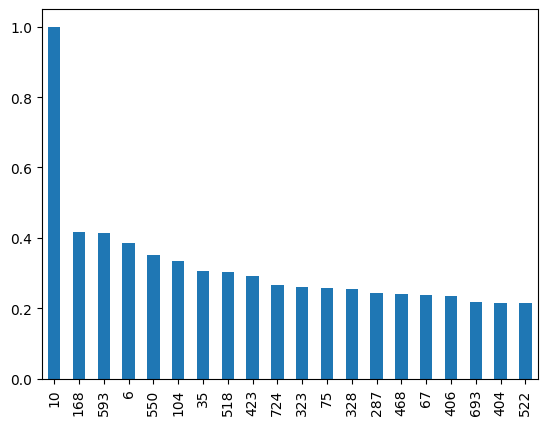

In [ ]:
pd.DataFrame(arr).loc[10].sort_values(ascending = False).head(20).plot(kind = 'bar')

<Axes: >

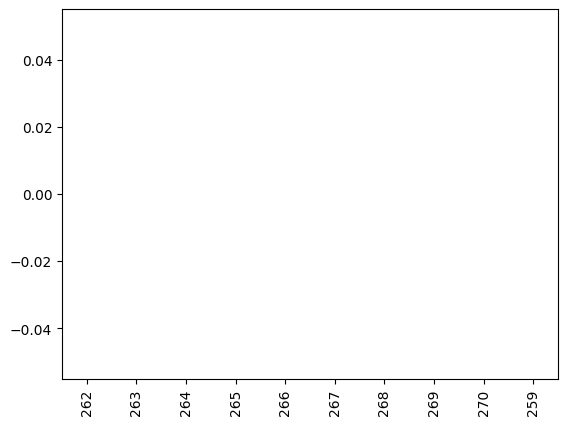

In [ ]:
pd.DataFrame(arr).loc[0].sort_values(ascending = False).tail(10).plot(kind = 'bar')

In [ ]:
short_trump_df['excerpt'].loc[10]

'Ο Πέδρο Αλμοδόβαρ χαρακτήρισε τον Ντόναλντ Τραμπ «καταστροφή» και «μεγαλύτερο λάθος της εποχής μας» σε ομιλία του στη Νέα Υόρκη.'

In [ ]:
short_trump_df['excerpt'].loc[15]

'Καναδάς- Κάρνεϊ: Να μη ξεχάσουμε την αμερικανική «προδοσία» -\xa0«Η παλιά σχέση μας με τις Ηνωμένες Πολιτείες τελείωσε» δήλωσε ο νέος πρωθυπουργός του Καναδά'

Ας δούμε την ομοιότητα των 10 πρώτων άρθρων σε ένα γράφημα (heatmap)

In [ ]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10]) # συγκρίνουμε τα 10 πρώτα άρθρα μεταξύ τους

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων (Τραμπ : Athens Voice)'}>

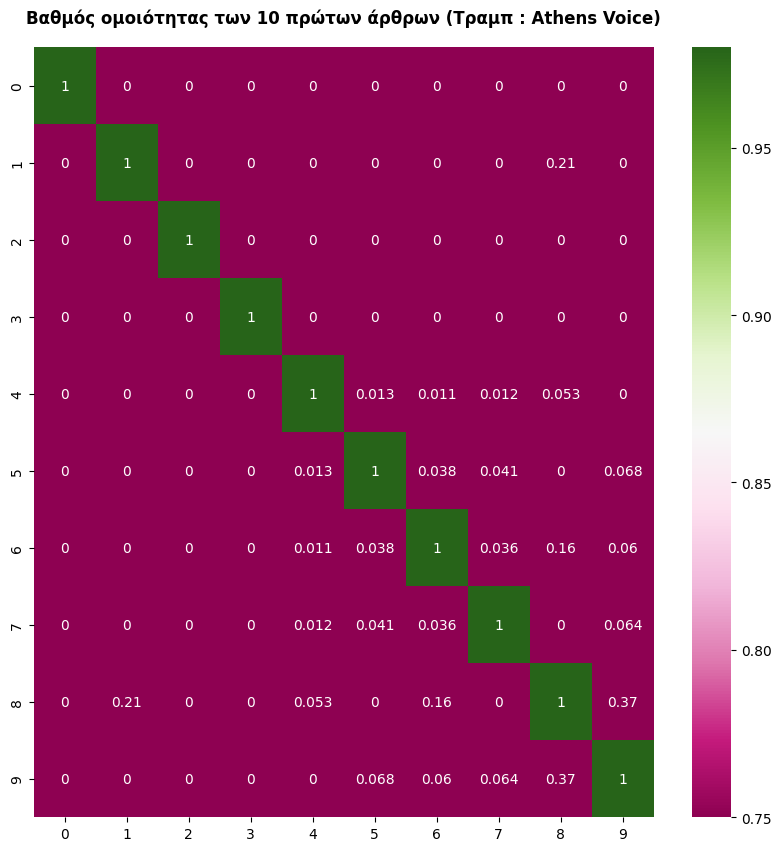

In [ ]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων (Τραμπ : Athens Voice)', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα

sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")

#plt.savefig('<το path και το όνομα του αρχείου>.png')

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

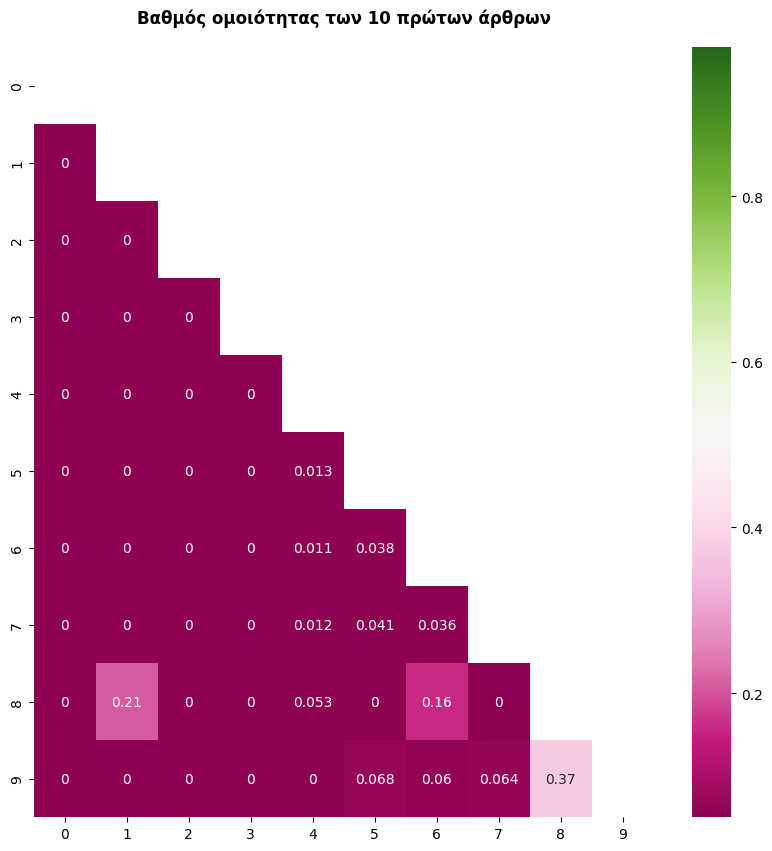

In [ ]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα

# mask
mask = np.triu(np.ones_like(arr, dtype=bool))
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="PiYG", mask=mask)

#plt.savefig('<το path και το όνομα του αρχείου>.png')